In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
import scipy
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

%matplotlib inline

Welcome to JupyROOT 6.12/06


### Open the file which has the noise islands stored. This is the output of islandAnalyzer.fcl

In [2]:
f = r.TFile("./output_islands_18713_00000_full.root") #original test before opening calo 20
#f = r.TFile("./output_islands_18722_00000.root") #original test before opening calo 20
#f = r.TFile("./output_islands_18731_00001.root") #after calo 20 had been opened
#f = r.TFile("./data/output_islands_18732_00000.root") #after replacing black tape
#f = r.TFile("./data/output_islands_18733_00000.root") #after replacing black tape and with dqm running

run_num = 18713
subRun_num = "00000"

In [3]:
f.cd("islands")
f.cd("islands/islands")

True

In [4]:
#f.ls()

In [5]:
t = f.Get("islands/islands/islandTree")
#t.Print()

### Make sure that this includes the calorimeters we want.

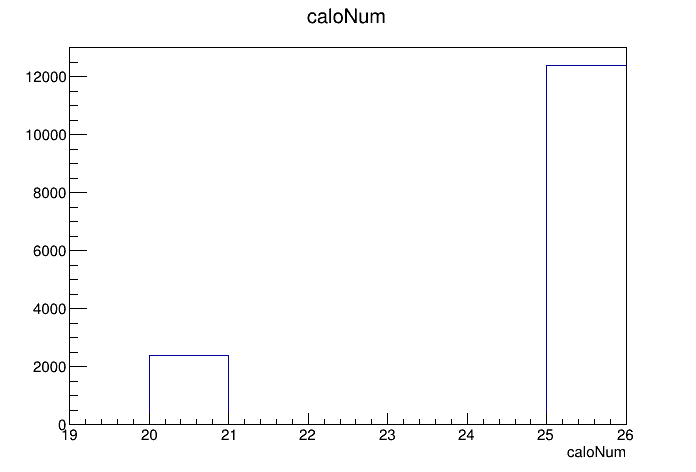

In [137]:
c = r.TCanvas()
t.Draw("caloNum","","")
c.Draw()

In [138]:
print(t.GetEntries())
total_entries = t.GetEntries()

14795


### Lets first make some plots of the islands. This will show what crystals are typically acting up

Starting Calo: 20
Entry # 1 ( counter: 1 )


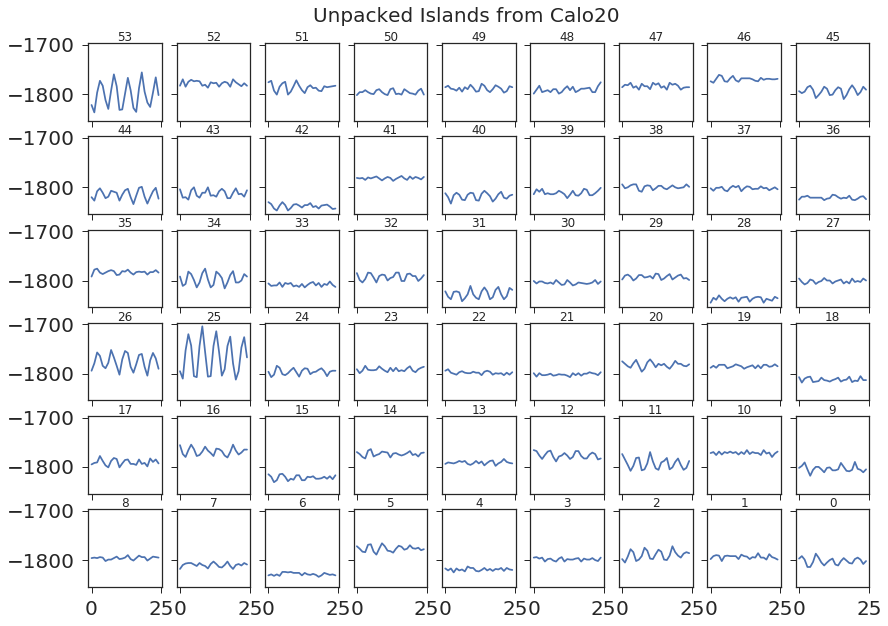

Entry # 7 ( counter: 2 )


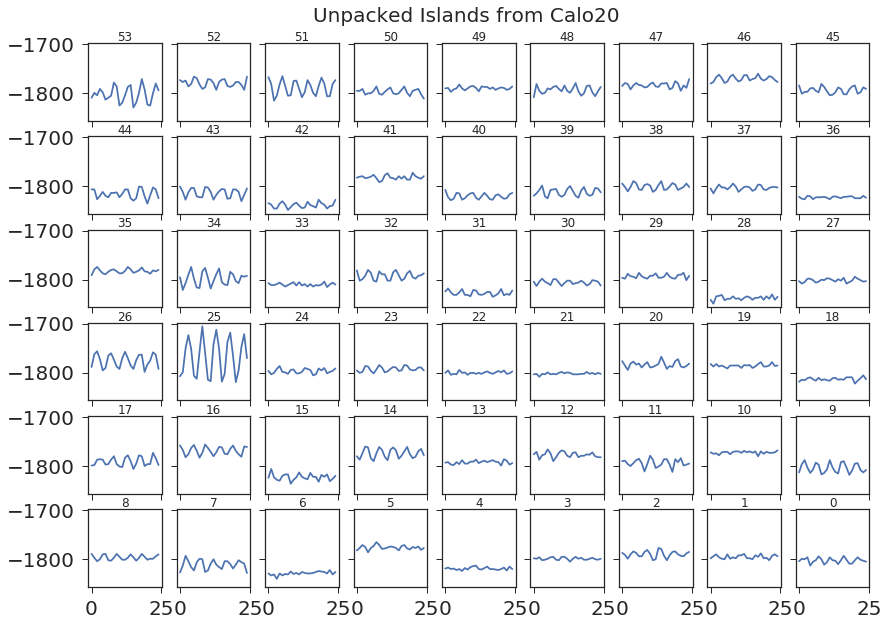

Entry # 13 ( counter: 3 )


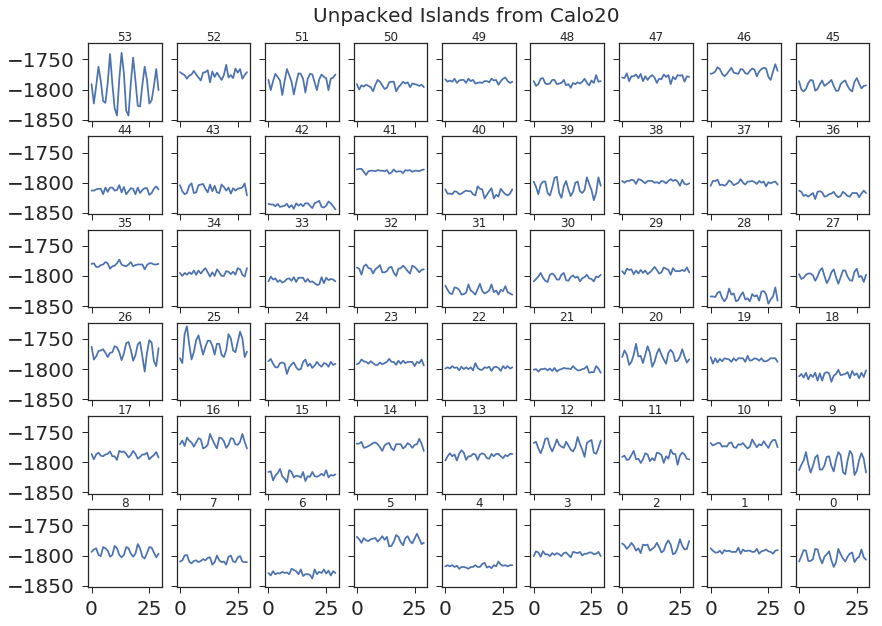

Entry # 29 ( counter: 4 )


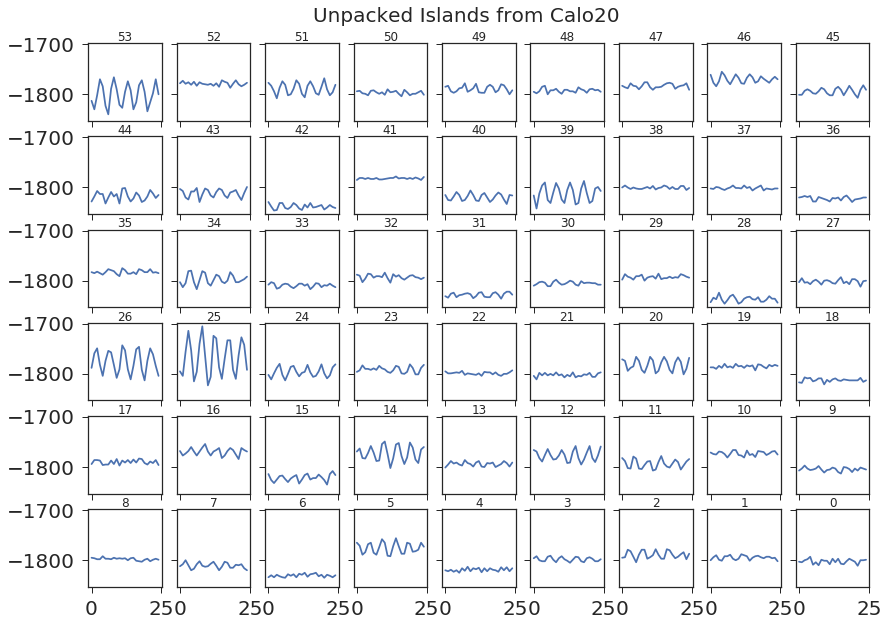

In [139]:
for caloNum in range(20,21):
    counter = 0
    print("Starting Calo:", caloNum)
    for i,entry in enumerate(t):
        if(int(t.caloNum) == caloNum):
            if counter < 0:
                counter = counter + 1
                continue
            if counter > 3:
                break
            counter = counter + 1

            fig, axarr = plt.subplots(6,9, sharey=True, sharex=True,figsize=(14, 10))
            print("Entry #", i+1, "( counter:", counter,")")
            plotVec = []
            for crystal in range(0,54):
                branchString = "t.xtal"+str(crystal)
                entryVeci = []
                rootVec = eval(branchString)# t.xtal53
                length = rootVec.size()
    #            print("     Crystal",crystal,"has length [("+branchString+").size()]", length)
                for ding in range(length):
                    entryVeci.append( rootVec[ding] )
                plotVec.append(entryVeci)

            plotVec.reverse()
            list1 = []
            list2 = []
            xtal = []
            list2xtal = []
            for crystal in range(54):
                list2.append(plotVec[crystal]) 
                list2xtal.append(crystal)
                if (crystal+1) % 9 == 0: #split into 9 column blocks
                    list1.append(list2)
                    list2 = []
                    list2xtal.reverse()
                    xtal.append(list2xtal)
                    list2xtal = []
            xtal.reverse()


            for ding in range(9):
                for j in range(6):
                    if(len(list1[j][ding]) < 1):
                        axarr[j,ding].plot(list1[j][ding],color='g') 
                    elif(np.abs( (list1[j][ding])[0] - np.max(list1[j][ding]) ) > 500):
                        axarr[j,ding].plot(list1[j][ding],color='r') 
                    else:
                        axarr[j,ding].plot(list1[j][ding],color='b') 
                    axarr[j,ding].set_title(str(xtal[j][ding]),y = 0.95)
#                    axarr[j,ding].set_yticklabels([])
#                    axarr[j,ding].set_xticklabels([])

            plt.suptitle("Unpacked Islands from Calo"+str(t.caloNum),y = 0.93, fontsize=20)
            #fig.tight_layout()

            plt.savefig("./images/UnpackedIslands_calo"+str(t.caloNum).zfill(2)+"_run"+str(run_num)+"_subRun"+subRun_num+"_entry"+str(i)
                        +".png",bbox_inches='tight')
            plt.show()

### Lets now look at just the results from xtal 53 (the noisiest xtal), as well as 25 and 49 (another noisy one and a good baseline)

In [140]:
noiseVec53 = []
noiseVec25 = []
noiseVec49 = []

for caloNum in range(20,21):
    counter = 0
    print("Starting Calo", caloNum)
    for i,entry in enumerate(t):
        if(i % 1000 == 0):
            print("     Entry #", i,"/",total_entries)
        if(int(t.caloNum) == caloNum):
            counter = counter + 1

#            print("Entry #", i+1)
            plotVec = []
            for crystal in range(0,54):
                branchString = "t.xtal"+str(crystal)
                entryVeci = []
                rootVec = eval(branchString)# t.xtal53
                length = rootVec.size()
                for ding in range(length):
                    entryVeci.append( rootVec[ding] )
                plotVec.append(entryVeci)

            plotVec.reverse()
            list1 = []
            list2 = []
            xtal = []
            list2xtal = []
            for crystal in range(54):
                list2.append(plotVec[crystal]) 
                list2xtal.append(crystal)
                if (crystal+1) % 9 == 0: #split into 9 column blocks
                    list1.append(list2)
                    list2 = []
                    list2xtal.reverse()
                    xtal.append(list2xtal)
                    list2xtal = []
            xtal.reverse()

            xtal53 = list1[0][0]
            noiseVec53.append( (np.amax(xtal53), np.amin(xtal53)) )
            xtal25 = list1[3][1]
            noiseVec25.append( (np.amax(xtal25), np.amin(xtal25)) )
            xtal49 = list1[0][4]
            noiseVec49.append( (np.amax(xtal49), np.amin(xtal49)) )
            
print("Processed", counter ,"non-laser entries")

Starting Calo 20
     Entry # 0 / 14795
     Entry # 1000 / 14795
     Entry # 2000 / 14795
     Entry # 3000 / 14795
     Entry # 4000 / 14795
     Entry # 5000 / 14795
     Entry # 6000 / 14795
     Entry # 7000 / 14795
     Entry # 8000 / 14795
     Entry # 9000 / 14795
     Entry # 10000 / 14795
     Entry # 11000 / 14795
     Entry # 12000 / 14795
     Entry # 13000 / 14795
     Entry # 14000 / 14795
Processed 2390 non-laser entries


Mean (+/- STDEV) for Xtal 53: 73.79539748953975 ( +\- 24.3611336430262 )
Mean (+/- STDEV) for Xtal 25: 101.52426778242678 ( +\- 27.505633447091927 )
Mean (+/- STDEV) for Xtal 49: 18.33347280334728 ( +\- 4.597944882733788 )


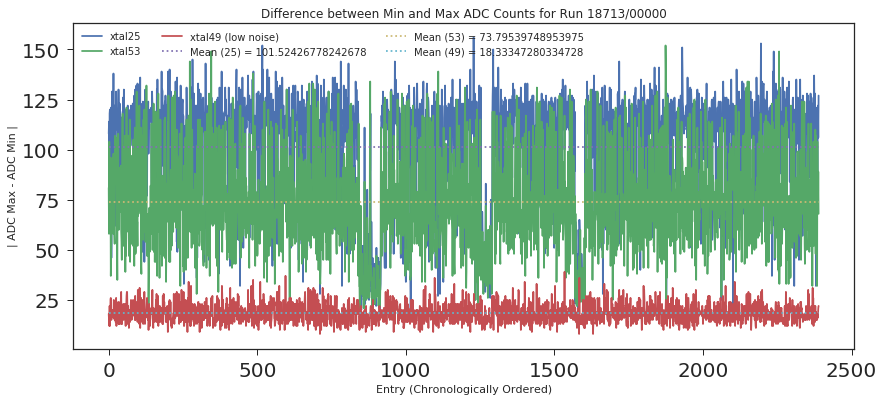

In [141]:
fig, ax = plt.subplots(figsize=(14, 6))
plt.plot([x[0] - x[1] for x in noiseVec25],'-',label='xtal25')
plt.plot([x[0] - x[1] for x in noiseVec53],'-',label='xtal53')
plt.plot([x[0] - x[1] for x in noiseVec49],'-',label='xtal49 (low noise)')

mean53 = np.mean([x[0] - x[1] for x in noiseVec53])
mean25 = np.mean([x[0] - x[1] for x in noiseVec25])
mean49 = np.mean([x[0] - x[1] for x in noiseVec49])
std49 = np.std([x[0] - x[1] for x in noiseVec49])
std53 = np.std([x[0] - x[1] for x in noiseVec53])
std25 = np.std([x[0] - x[1] for x in noiseVec25])

print("Mean (+/- STDEV) for Xtal 53:", mean53, "( +\-",std53,")")
print("Mean (+/- STDEV) for Xtal 25:", mean25, "( +\-",std25,")")
print("Mean (+/- STDEV) for Xtal 49:", mean49, "( +\-",std49,")")


plt.plot([0,len(noiseVec25)],[mean25,mean25],':',label='Mean (25) = '+str(mean25))
plt.plot([0,len(noiseVec53)],[mean53,mean53],':',label='Mean (53) = '+str(mean53))
plt.plot([0,len(noiseVec49)],[mean49,mean49],':',label='Mean (49) = '+str(mean49))
plt.legend(ncol=3)
plt.ylabel("| ADC Max - ADC Min |")
plt.xlabel("Entry (Chronologically Ordered)")
plt.title("Difference between Min and Max ADC Counts for Run "+str(run_num)+"/"+str(subRun_num))
#plt.ylim(0,180)
#plt.xlim(3440,3480)
plt.show()

### Now lets compare our noisy crystals

Lets look and see how many of these are triggered on 25 vs. 53 ( which we can estimate based on the relative size of the min - max plots)

If the height of 53 is > the height of 25, then append 1. Otherwise 0.
This is true 20.83682008368201 % of the time


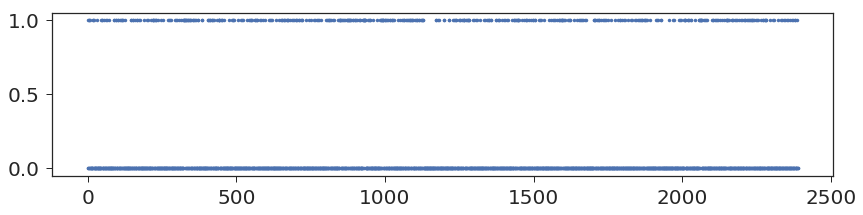

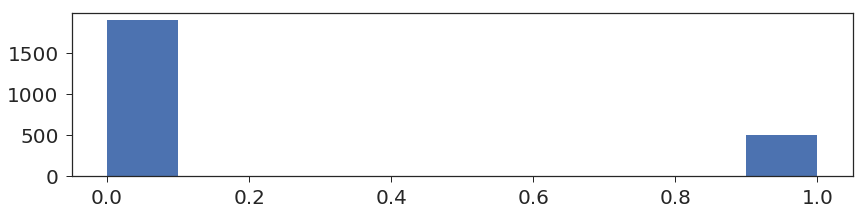

In [142]:
diffvec = []
vec25 = [x[0] - x[1] for x in noiseVec25]
vec53 = [x[0] - x[1] for x in noiseVec53]
vec49 = [x[0] - x[1] for x in noiseVec49]
for i in range(len(vec53)):
    diff = vec53[i] - vec25[i]
    if(diff > 0):
        diffvec.append(1)
    else:
        diffvec.append(0)

print("If the height of 53 is > the height of 25, then append 1. Otherwise 0.")
print("This is true", np.sum(diffvec)/len(diffvec)*100,"% of the time")
fig, ax = plt.subplots(figsize=(14, 3))
plt.plot(diffvec,'.')
plt.show()
fig, ax = plt.subplots(figsize=(14, 3))
plt.hist(diffvec)
plt.show()

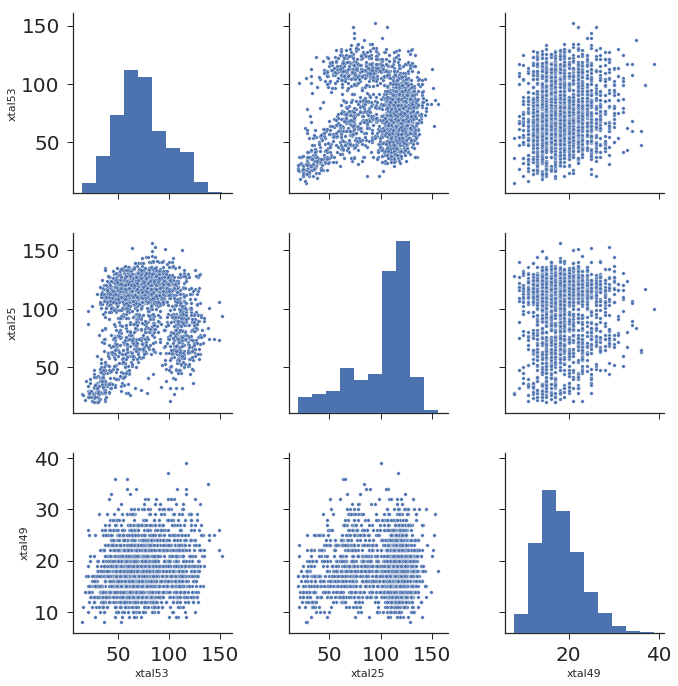

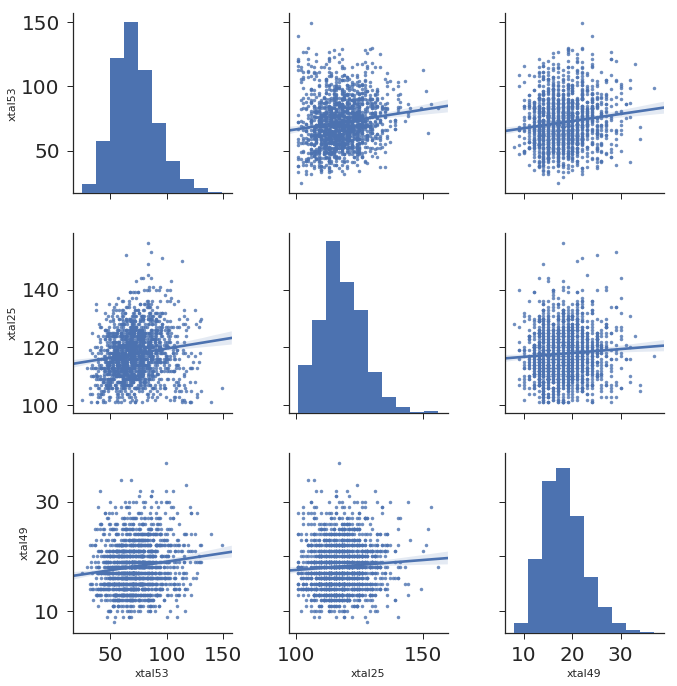

In [143]:
d = pandas.DataFrame({'xtal53':vec53,'xtal25':vec25,'xtal49':vec49})
dlow = d.loc[d['xtal53']<100].loc[d['xtal25']<100] 
dhigh = d.loc[d['xtal25']>100]

g = sns.pairplot(data = d, kind='scatter', markers='.')
g2 = sns.pairplot(data = dhigh, kind='reg', markers='.',palette='hus1')
g.fig.set_size_inches(10,10)
g2.fig.set_size_inches(10,10)
plt.show()

Lets use some python to get an idea of the correllation between the two datasets. These range between -1 and +1, with 0 implying no correllation.

In [144]:
print("Pearson: ",scipy.stats.pearsonr(vec25,vec53))
print("Point Biserial: ",scipy.stats.pointbiserialr(vec25,vec53))
print("Spearman: ",scipy.stats.spearmanr(vec25,vec53))

Pearson:  (0.09544105527302245, 2.952186240768173e-06)
Point Biserial:  PointbiserialrResult(correlation=0.09544105527302245, pvalue=2.952186240768173e-06)
Spearman:  SpearmanrResult(correlation=0.06719302048776793, pvalue=0.0010129541329919613)


We can also do the comparison for just the low value xtals

In [145]:
print("Pearson: ",scipy.stats.pearsonr(dlow['xtal25'],dlow['xtal53']))
print("Point Biserial: ",scipy.stats.pointbiserialr(dlow['xtal25'],dlow['xtal53']))
print("Spearman: ",scipy.stats.spearmanr(dlow['xtal25'],dlow['xtal53']))

Pearson:  (0.60221641617534, 2.616400510734933e-48)
Point Biserial:  PointbiserialrResult(correlation=0.60221641617534, pvalue=2.616400510734933e-48)
Spearman:  SpearmanrResult(correlation=0.6005683798284439, pvalue=5.476571909161669e-48)


We can also do the comparison for just the high value xtals

In [146]:
print("Pearson: ",scipy.stats.pearsonr(dhigh['xtal25'],dhigh['xtal53']))
print("Point Biserial: ",scipy.stats.pointbiserialr(dhigh['xtal25'],dhigh['xtal53']))
print("Spearman: ",scipy.stats.spearmanr(dhigh['xtal25'],dhigh['xtal53']))

Pearson:  (0.13992290940955762, 1.5401409116634456e-08)
Point Biserial:  PointbiserialrResult(correlation=0.13992290940955762, pvalue=1.5401409116634456e-08)
Spearman:  SpearmanrResult(correlation=0.16837752409294365, pvalue=8.934971045272237e-12)


### We can also get an idea of the frequency that this noise operates at

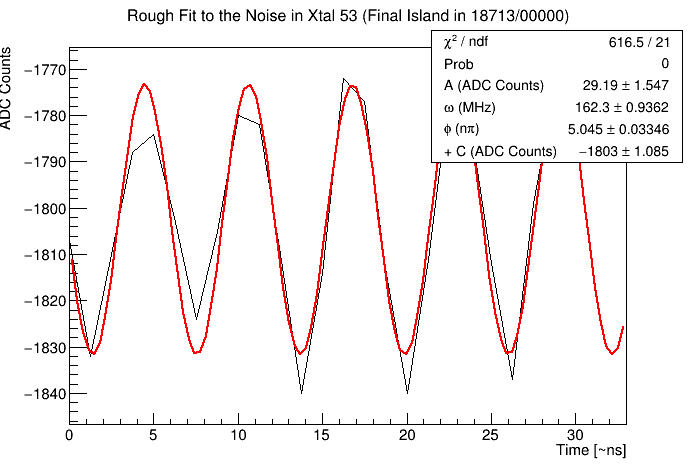

In [147]:
def sinefit(x, p):
    return p[0]*r.TMath.Sin( p[1]*x[0]/1000*(2*r.TMath.Pi()) + p[2]*r.TMath.Pi() ) + p[3]


func1 = r.TF1("func1", sinefit, 0,35,4)
func1.SetParameters(1,170,0,-1800)
func1.SetParNames('A (ADC Counts)','#omega (MHz)','#phi (n#pi)','+ C (ADC Counts)')

gr = r.TGraph()
for i, adc in enumerate(xtal53):
    gr.SetPoint(i,i*1.25,adc)

for i in range(2):
    gr.Fit("func1","REMQ")
func1.Draw("SAME")
    
c = r.TCanvas()
gr.SetTitle("Rough Fit to the Noise in Xtal 53 (Final Island in "+str(run_num)+"/"+subRun_num+")")
gr.GetXaxis().SetTitle("Time [~ns]")
gr.GetYaxis().SetTitle("ADC Counts")
gr.Draw()
c.Draw()

#print("Noise Frequency:", func1.GetParameter(1),"MHz") #frequency is in Cycles / ns

### Now lets see if we can look at all of the crystals at the same time

In [6]:
noiseVecAll = []

for caloNum in range(20,21):
    counter = 0
    print("Starting Calo", caloNum)
    for i,entry in enumerate(t):
        if(i % 1000 == 0):
            print("     Entry #", i)
        if(int(t.caloNum) == caloNum):
            counter = counter + 1

#            print("Entry #", i+1)
            plotVec = []
            for crystal in range(0,54):
                branchString = "t.xtal"+str(crystal)
                entryVeci = []
                rootVec = eval(branchString)# t.xtal53
                length = rootVec.size()
                for ding in range(length):
                    entryVeci.append( rootVec[ding] )
                plotVec.append(entryVeci)

            plotVec.reverse()

            noiseVeci = []
            for crystal in range(54):
                noiseVeci.append( np.amax(plotVec[crystal]) -  np.amin(plotVec[crystal]) )
                
            noiseVecAll.append(noiseVeci)


noiseVecAll = list(zip(*noiseVecAll))
noiseVecAll.reverse()

print("Processed", counter ,"non-laser entries")

Starting Calo 20
     Entry # 0
     Entry # 1000
     Entry # 2000
     Entry # 3000
     Entry # 4000
     Entry # 5000
     Entry # 6000
     Entry # 7000
     Entry # 8000
     Entry # 9000
     Entry # 10000
     Entry # 11000
     Entry # 12000
     Entry # 13000
     Entry # 14000
Processed 2390 non-laser entries


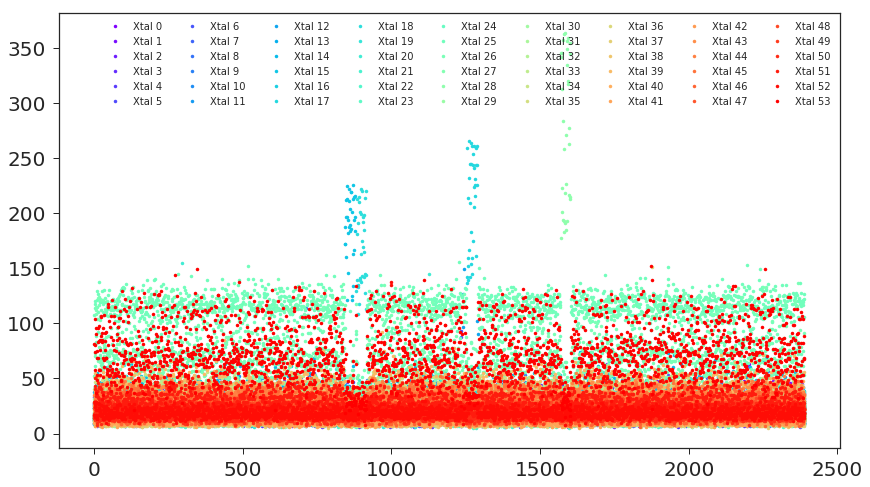

In [7]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, len(noiseVecAll)))

fig, ax = plt.subplots(figsize=(14, 8))
for i, ding in enumerate(noiseVecAll):
    plt.plot(ding, '.', label='Xtal '+str(i), color = colors[i])
plt.legend(ncol=9)
plt.show()

[0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 35, 0, 36, 34, 0, 2, 0, 0, 0, 0, 1621, 409, 0, 34, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 407]


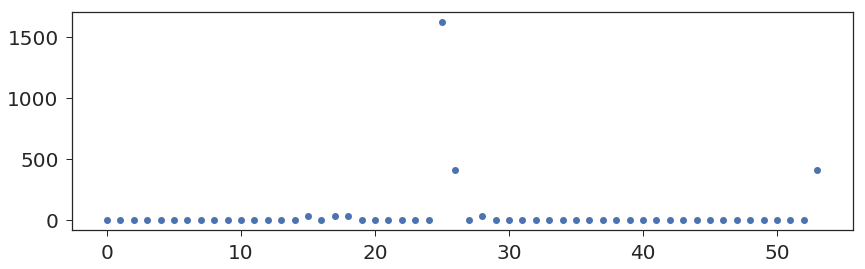

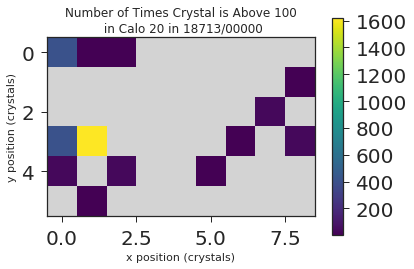

In [8]:
above100Vec = []
cutoff = 100
for i, ding in enumerate(noiseVecAll):
    above100 = 0
    for entry in ding:
        if entry > cutoff:
            above100 += 1
    above100Vec.append(above100)
    
print(above100Vec)
fig, ax = plt.subplots(figsize=(14, 4))
plt.plot(above100Vec,'o')
plt.show()


list1 = []
list2 = []
for i in range(54):
    list2.append(above100Vec[53-i]) 
    if (i+1) % 9 == 0: #split into 9 column blocks
        list1.append(list2)
        list2 = []

        
from matplotlib.colors import LogNorm

cmap = plt.cm.viridis
cmap.set_under(color='lightgrey')    
cmap.set_bad(color='lightgrey')  

plt.imshow(list1,cmap=cmap,vmin=0.1)#,norm=LogNorm(vmin=1, vmax=10000))
plt.title("Number of Times Crystal is Above "+str(cutoff)+"\n in Calo 20 in "+str(run_num)+"/"+subRun_num)
plt.xlabel('x position (crystals)')
plt.ylabel('y position (crystals)')
plt.colorbar()
plt.savefig("./images/weirdNoiseCrystals_above"+str(cutoff)+"_run"+str(run_num)+"_"+subRun_num+".png")
plt.show()

In [9]:
dfull = pandas.DataFrame(list(zip(*noiseVecAll)))
dfull.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,...,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000
mean,22.260669,13.163180,26.138912,11.969038,11.854393,22.640586,12.874059,20.948536,16.721339,24.246025,...,28.704603,26.717573,17.726360,19.994142,22.312552,18.333473,17.470293,29.705858,19.109205,73.795397
std,6.888291,2.604883,6.978046,2.454757,1.997417,7.263856,3.440038,5.967355,4.342322,7.929348,...,7.028003,8.662558,5.748206,4.461261,4.841546,4.598907,4.330110,9.472001,5.307399,24.366232
min,8.000000,6.000000,10.000000,6.000000,6.000000,8.000000,7.000000,8.000000,8.000000,8.000000,...,11.000000,9.000000,6.000000,9.000000,11.000000,8.000000,8.000000,11.000000,8.000000,15.000000
25%,17.000000,11.000000,21.000000,10.000000,10.000000,18.000000,11.000000,17.000000,14.000000,19.000000,...,24.000000,20.000000,14.000000,17.000000,19.000000,15.000000,14.000000,23.000000,16.000000,57.000000
50%,21.000000,13.000000,26.000000,12.000000,12.000000,21.000000,12.000000,20.000000,16.000000,23.000000,...,28.000000,26.000000,17.000000,20.000000,22.000000,18.000000,17.000000,28.000000,19.000000,71.000000
75%,26.000000,15.000000,31.000000,13.000000,13.000000,26.750000,14.000000,24.000000,19.000000,28.000000,...,33.000000,32.000000,21.000000,22.000000,25.000000,21.000000,20.000000,35.000000,21.000000,88.750000
max,63.000000,25.000000,61.000000,24.000000,20.000000,93.000000,40.000000,114.000000,34.000000,63.000000,...,55.000000,59.000000,43.000000,49.000000,45.000000,39.000000,34.000000,120.000000,138.000000,152.000000


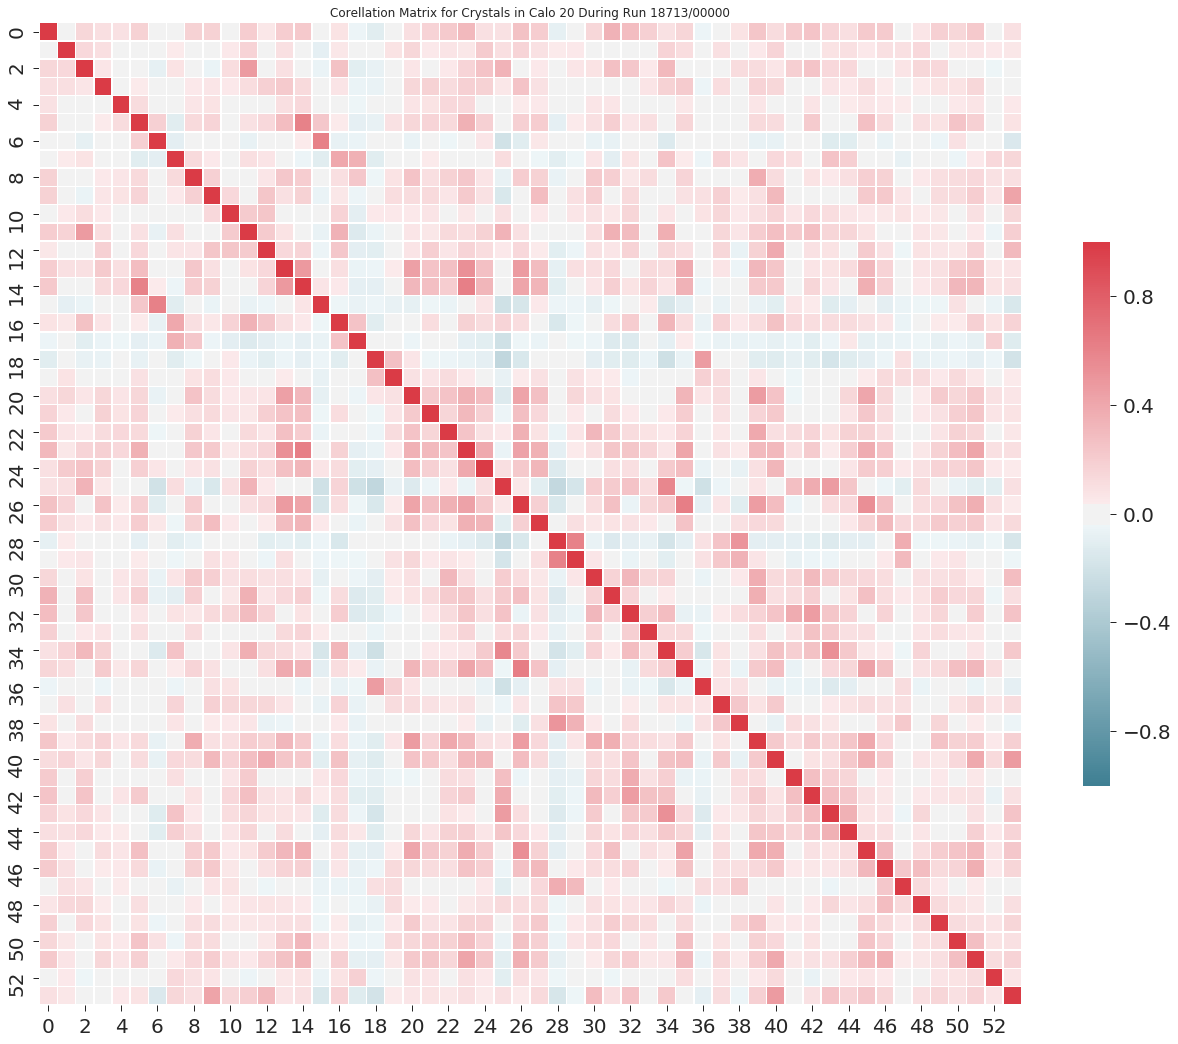

In [27]:
#g = sns.pairplot(data = dfull, kind='scatter', markers='.') #this takes fiveever.
#g.fig.set_size_inches(200,200)
#plt.savefig("./images/weirdNoiseCrystals_Correllation_full_run"+str(run_num)+"_"+subRun_num+".png")
#plt.show()

corr = dfull.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#cmap=plt.cm.viridis

# Draw the heatmap with the mask and correct aspect ratio
#, mask=mask
sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Corellation Matrix for Crystals in Calo 20 During Run "+str(run_num)+"/"+subRun_num)
plt.savefig("./images/weirdNoiseCrystals_Correllation_run"+str(run_num)+"_"+subRun_num+".png")

plt.show()